<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 1*

# 📝 Assignment
---

# Decision Trees(결정트리)

## 캐글 인클래스(InClass) Competitions



### 1) EDA를 수행합시다


- [캐글 계정을 만드세요](https://www.kaggle.com/), 공유된 인클래스 대회 url을 통해 이동한 후 대회에 참여하세요.
- H1N1 데이터를 훈련/검증/테스트 셋으로 나누어 준비하세요
- profiling을 사용하여 데이터를 살펴보고, missing value, zeros, cardinarity 등을 확인하여 처리하세요.
- 본인만의 특성공학을 수행하세요.
- **(객관식) H1N1 분류기의 기준모델을 설정하세요. 기준모델의 정확도를 과제 제출폼에 제출하세요.**
    1. 0.24
    2. 0.50
    3. 0.76
    4. 1

#### 데이터 셋 추가 및 확인

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
target = 'vacc_h1n1_f'
# target = 'vacc_seas_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

In [3]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

In [4]:
!pip install pandas-profiling==2.11.0 --upgrade
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/48 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# object describe 보기
train.describe(exclude='number').T.sort_values(by='unique', ascending=False)

,count,unique,top,freq
state,33723,51,CALIFORNIA,829
employment_occupation,13714,25,Management Occupations,1769
employment_industry,13714,23,Health Care and Social Assistance Industries,2451
agegrp,33723,7,65+ Years,6821
opinion_h1n1_vacc_effective,26637,6,Somewhat Effective,11710
opinion_h1n1_risk,26602,6,Somewhat Low,9980
opinion_h1n1_sick_from_vacc,26568,6,Not Very Worried,9229
opinion_seas_vacc_effective,26519,6,Somewhat Effective,11571
opinion_seas_risk,26466,6,Somewhat Low,9057
opinion_seas_sick_from_vacc,26413,6,Not At All Worried,11813


In [6]:
selected_cols = train.select_dtypes(include=['number', 'object'])
labels = selected_cols.nunique()
labels[labels < 25].index.tolist()

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_insurance',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'agegrp',
 'education_comp',
 'raceeth4_i',
 'sex_i',
 'inc_pov',
 'marital',
 'rent_own_r',
 'employment_status',
 'census_region',
 'census_msa',
 'n_adult_r',
 'household_children',
 'n_people_r',
 'employment_industry',
 'hhs_region',
 'vacc_h1n1_f']

#### 특성 엔지니어링

In [7]:
import numpy as np

# df 엔지니어링
def engineer(df) :

  # 높은 카디널리티 특성 제거 
  selected_cols = df.select_dtypes(include=['number','object'])
  labels = selected_cols.nunique()
  features = labels[labels < 25].index.tolist() # 카디널리티 25 미만 선택
  df = df[features]

  # behavioral 점수 컬럼 생성, 기존 행동 특성 제거
  behaviorals = [col for col in df.columns if 'behavioral' in col] 
  df['behaviorals'] = df[behaviorals].sum(axis=1)
  df.drop(columns=behaviorals, inplace=True)

  return df

train = engineer(train)
val = engineer(val)
test = engineer(test)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_insurance,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,agegrp,education_comp,raceeth4_i,sex_i,inc_pov,marital,rent_own_r,employment_status,census_region,census_msa,n_adult_r,household_children,n_people_r,employment_industry,hhs_region,vacc_h1n1_f,behaviorals
20365,1.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,Somewhat Effective,Somewhat Low,Not At All Worried,Very Effective,Somewhat Low,Not At All Worried,18 - 34 Years,4.0,3,1,1,2.0,1.0,Employed,1,"MSA, Not Principle City",4.0,0.0,4.0,"Professional, Scientific, and Technical Servic...",2,0,0.0
29138,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,Somewhat Effective,Somewhat High,Not Very Worried,Somewhat Effective,Somewhat Low,Not Very Worried,35 - 44 Years,2.0,3,2,3,2.0,2.0,Unemployed,2,Non-MSA,2.0,2.0,4.0,NaN,7,1,5.0
36128,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,Not Very Effective,Very Low,Dont Know,Somewhat Effective,Very Low,Very Worried,65+ Years,1.0,3,2,2,2.0,1.0,Not in Labor Force,4,"MSA, Not Principle City",1.0,0.0,1.0,NaN,10,0,4.0
39793,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Very Effective,Somewhat Low,Not Very Worried,Somewhat Effective,Very Low,Not At All Worried,55 - 64 Years,4.0,3,1,1,1.0,1.0,Employed,2,"MSA, Principle City",2.0,0.0,2.0,"Arts, Entertainment, and Recreation Industries...",7,0,3.0
32973,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,Not At All Effective,Somewhat Low,Not At All Worried,Not At All Effective,Very Low,Not At All Worried,18 - 34 Years,4.0,3,2,2,1.0,1.0,Not in Labor Force,2,Non-MSA,2.0,3.0,5.0,NaN,7,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8747,NaN,NaN,0.0,1.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 Months - 9 Years,NaN,3,1,4,NaN,1.0,NaN,2,"MSA, Not Principle City",4.0,1.0,5.0,NaN,5,0,0.0
4412,3.0,2.0,1.0,1.0,0.0,0.0,NaN,0.0,Not Very Effective,Somewhat High,Very Worried,Not Very Effective,Very High,Very Worried,55 - 64 Years,2.0,3,2,2,1.0,1.0,Not in Labor Force,2,"MSA, Not Principle City",2.0,0.0,2.0,NaN,5,0,6.0
19064,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 Months - 9 Years,NaN,3,1,2,NaN,1.0,NaN,3,Non-MSA,2.0,1.0,3.0,NaN,4,0,0.0
40906,NaN,NaN,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10 - 17 Years,NaN,3,1,1,NaN,1.0,NaN,4,Non-MSA,3.0,1.0,4.0,NaN,8,0,0.0


In [8]:
# 데이터 타겟과 특성 분리
features = train.drop(columns=[target]).columns

X_train = train[features]
X_val = val[features]
X_test = test[features]
y_train = train[target]
y_val = val[target]

#### 기준모델 설정

In [9]:
# 기준모델 설정
y_train.value_counts(normalize=True)
major = y_train.mode()[0] # mode() 가장 자주 나타나는 값 리턴
y_pred = [major] * len(y_train)


In [10]:
# 최다 클래스의 빈도가 정확도가 됩니다.
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.7609346736648578


### 2) 모델 개발
- 결정트리를 학습시킵니다. 하이퍼파라미터를 수정하여 성능을 높여보세요. 과적합을 주의하세요!
- 검증세트 스코어를 확인하세요.(평가지표는 F1-score입니다, 수식은 캐글 Overview-Evaluation 페이지를 확인해 주세요. 평가지표에 대한 내용은 다음에 자세히 배우고 활용할 것입니다 지금은 스코어를 올리기 위한 노력을 전혀 기울이지 말고 결정트리의 개념과 코드이해, 사용에 집중하세요!)
- 특성중요도를 그래프로 나타내 보세요
- **검증세트의 F1-score를 과제 제출폼에 제출하세요. (0.5 이상 통과)**

In [11]:
### 이곳에서 과제를 진행해 주세요 ###
!pip install category_encoders
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

     |████████████████████████████████| 80 kB 3.2 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### 기본 의사결정모델 적용

In [26]:
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=7,random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도:  0.8307090116537674
검증 정확도:  0.8278970466136876


In [27]:
from sklearn.metrics import f1_score
print('f1_score 점수 : ',f1_score(y_val,y_pred))

f1_score 점수 :  0.5435671594841145


#### 의사결정트리 성능 수정

In [14]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=7, min_samples_leaf=100, random_state=2)
)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)
print('f1_score 점수 : ',f1_score(y_val,y_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 0.8259644752839308
검증 정확도 0.8281342663978176
f1_score 점수 :  0.5844565529108116


In [15]:
y_pred = pipe.predict(X_test)
# print('f1_score 점수 : ',f1_score(y_val,y_pred))
submission = pd.DataFrame(data=[X_test.index,y_pred]).T
submission.columns = ['Id','vacc_h1n1_f']
submission

,Id,vacc_h1n1_f
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
28099,28099,0
28100,28100,0
28101,28101,0
28102,28102,0


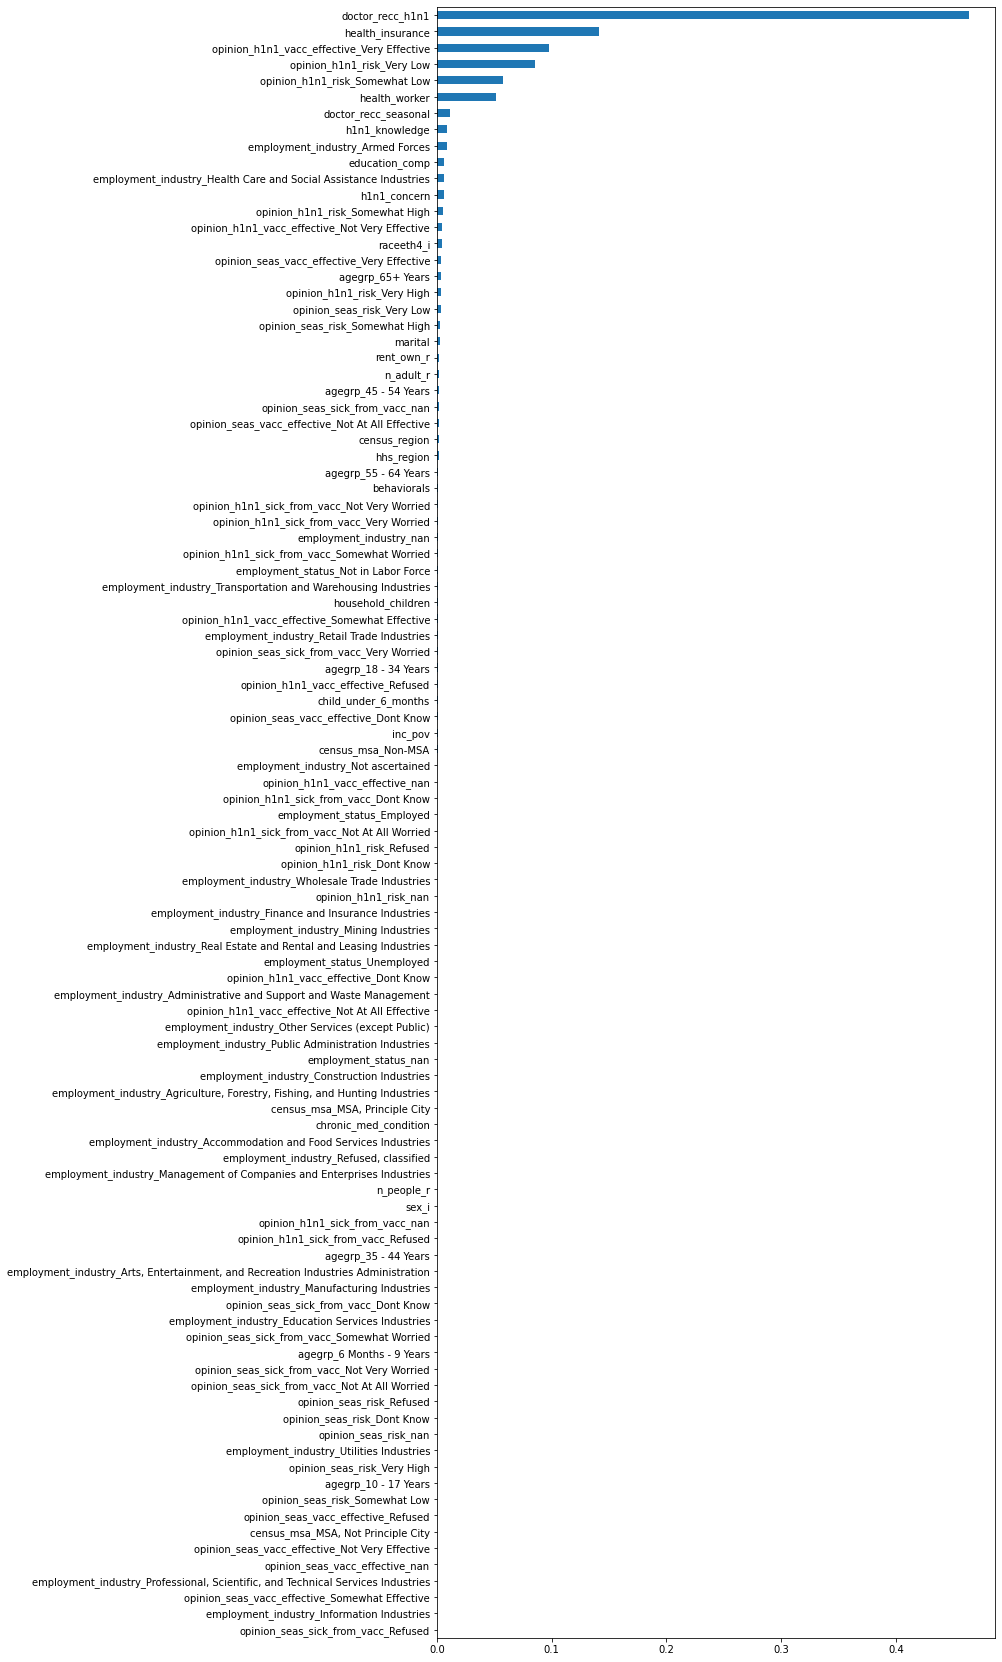

In [30]:
import matplotlib.pyplot as plt

model_dt = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

### 3) 캐글 대회 참여

- 테스트셋에 대한 예측 결과를 캐글에 제출 하세요.(스코어가 많이 낮게 나와도 결정트리를 잘 이해하고 결과를 내었다면 충분합니다!)
- **캐글 Leaderboard의 본인 Score를 과제 제출폼에 제출하세요.**
 

In [16]:
submission.to_csv("submission2.csv", mode='w')

## 🔥 도전과제

### 4) 다른 종류의 imputer를 사용하고 특성-타겟 관계 그래프를 나타내 보세요.
- 다른 종류의 imputer를 사용해 보세요([scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html))
- seaborn plots 사용하여 관심있는 특성들과 target간의 관계를 그래프로 나타내 보세요.
- [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html)
- [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html)

In [17]:
### 이곳에서 과제를 진행해 주세요 ###